In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('sonar.csv',header=None)
df.head()

0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

       58      59  60  
0  0.0090  0.0032   R  
1  0.0052  0.0044   R  
2  0.0095  0.0078   R  
3  0.0040  0.0117   R  
4  0.0107  0.0094   R  

[5 rows x 61 columns]

In [3]:
df.shape

(208, 61)

In [9]:
d1=df[60].value_counts()
d1

M    111
R     97
Name: 60, dtype: int64

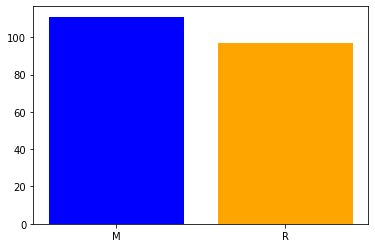

In [12]:
plt.bar(d1.index,d1.values,color=['blue','orange'])
plt.show()

In [10]:
df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object

In [11]:
df.duplicated().sum()

0

In [13]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
print(x.shape)
print(y.shape)

(208, 60)
(208,)


In [14]:
y.head()

0    R
1    R
2    R
3    R
4    R
Name: 60, dtype: object

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(156, 60)
(52, 60)
(156,)
(52,)


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [20]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [28]:
def gen_metrics(ytest,ypred):
    print('Accuracy Score',accuracy_score(ytest,ypred))
    cm=confusion_matrix(ytest,ypred)
    print(cm)
    print(classification_report(ytest,ypred))

def train_test_score(model):
    print('Training Score',model.score(x_train,y_train))
    print('Testing Score',model.score(x_test,y_test))

#### Decision Tree Classifier

In [66]:
m1=DecisionTreeClassifier(criterion='entropy',max_depth=12,min_samples_split=10)
m1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_split=10)

In [67]:
train_test_score(m1)

Training Score 0.9935897435897436
Testing Score 0.7884615384615384


In [39]:
ypred_m1=m1.predict(x_test)
print(ypred_m1)

['M' 'R' 'M' 'R' 'M' 'R' 'M' 'R' 'R' 'R' 'M' 'M' 'M' 'M' 'M' 'R' 'M' 'M'
 'R' 'R' 'M' 'R' 'R' 'R' 'R' 'R' 'R' 'M' 'M' 'R' 'R' 'R' 'M' 'M' 'M' 'R'
 'M' 'R' 'M' 'R' 'M' 'M' 'M' 'R' 'M' 'R' 'M' 'M' 'M' 'R' 'M' 'R']


In [40]:
gen_metrics(y_test,ypred_m1)

Accuracy Score 0.7307692307692307
[[21  8]
 [ 6 17]]
              precision    recall  f1-score   support

           M       0.78      0.72      0.75        29
           R       0.68      0.74      0.71        23

    accuracy                           0.73        52
   macro avg       0.73      0.73      0.73        52
weighted avg       0.73      0.73      0.73        52



#### Random Forest Classifier

In [73]:
m2=RandomForestClassifier(n_estimators=125,criterion='gini',max_depth=10,min_samples_split=8)
m2.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=8, n_estimators=125)

In [74]:
train_test_score(m2)

Training Score 1.0
Testing Score 0.8461538461538461


In [75]:
ypred_m2=m2.predict(x_test)
print(ypred_m2)

['R' 'R' 'M' 'R' 'M' 'R' 'M' 'R' 'R' 'M' 'M' 'M' 'R' 'M' 'M' 'R' 'R' 'M'
 'M' 'R' 'M' 'R' 'R' 'M' 'R' 'M' 'R' 'M' 'M' 'R' 'R' 'R' 'R' 'M' 'M' 'R'
 'M' 'M' 'M' 'R' 'M' 'M' 'M' 'R' 'M' 'M' 'R' 'R' 'M' 'R' 'M' 'R']


In [76]:
print('Metrics for Random Forest Classifier')
gen_metrics(y_test,ypred_m2)

Metrics for Random Forest Classifier
Accuracy Score 0.8461538461538461
[[24  5]
 [ 3 20]]
              precision    recall  f1-score   support

           M       0.89      0.83      0.86        29
           R       0.80      0.87      0.83        23

    accuracy                           0.85        52
   macro avg       0.84      0.85      0.85        52
weighted avg       0.85      0.85      0.85        52



### HyperParameter Tuning 

Tuning model hyperparameters such that the model generates the best performance.

There are 2 methods of Hyperparameter Tuning<br>
<b>1)GridSearchCV</b><br>
a) It takes into consideration all the permutations and combinations of the hyperparameters and returns the hyperparameters that would generate the best result.<br>
b)It contains a lot of time.<br>

<b>2) RandomizedSearchCV</b><br>
a)It takes into consideration some random subset of hyperparameters and returns the hyperparameters that would generate the best out of those randomly sa,pled hyperparameters.
b)It consumes a comparatively less time. 

In [50]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### Applying Decison Tree using RandomizedSearchCV and GridSearchCV

In [85]:
params_dt={'criterion':['gini','entropy'],
          'max_depth':[10,12,8,7,6],
          'min_samples_split':[7,9,10,12,15,20]}

In [86]:
dt1=DecisionTreeClassifier()
rs1=RandomizedSearchCV(dt1,param_distributions=params_dt,scoring='accuracy')
rs1.fit(x_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 12, 8, 7, 6],
                                        'min_samples_split': [7, 9, 10, 12, 15,
                                                              20]},
                   scoring='accuracy')

In [87]:
train_test_score(rs1)

Training Score 0.9871794871794872
Testing Score 0.7884615384615384


In [88]:
print(rs1.best_params_)
print(rs1.best_estimator_)

{'min_samples_split': 10, 'max_depth': 6, 'criterion': 'entropy'}
DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=10)


In [89]:
dt2=DecisionTreeClassifier()
gs1=GridSearchCV(dt2,param_grid=params_dt,scoring='accuracy',n_jobs=1)
gs1.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 8, 7, 6],
                         'min_samples_split': [7, 9, 10, 12, 15, 20]},
             scoring='accuracy')

In [90]:
train_test_score(gs1)

Training Score 0.9935897435897436
Testing Score 0.7884615384615384


In [91]:
print(gs1.best_params_)
print(gs1.best_estimator_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 9}
DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=9)


### Applying GridSearchCV and RandomizedSearchCV on RandomForestClassifier

In [92]:
params_rf={'n_estimators':[75,100,125,150],
          'criterion':['gini','entropy'],
          'max_depth':[10,12,15],
          'min_samples_split':[8,14,20]}

In [93]:
rf1=RandomForestClassifier()
rs2=RandomizedSearchCV(rf1,param_distributions=params_rf,scoring='accuracy')
rs2.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 12, 15],
                                        'min_samples_split': [8, 14, 20],
                                        'n_estimators': [75, 100, 125, 150]},
                   scoring='accuracy')

In [94]:
train_test_score(rs2)

Training Score 1.0
Testing Score 0.8269230769230769


In [95]:
print(rs2.best_params_)
print(rs2.best_estimator_)

{'n_estimators': 75, 'min_samples_split': 14, 'max_depth': 12, 'criterion': 'gini'}
RandomForestClassifier(max_depth=12, min_samples_split=14, n_estimators=75)


In [104]:
rf2=RandomForestClassifier()
gs2=GridSearchCV(rf2,param_grid=params_rf,scoring='accuracy',n_jobs=1)
gs2.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 15],
                         'min_samples_split': [8, 14, 20],
                         'n_estimators': [75, 100, 125, 150]},
             scoring='accuracy')

In [105]:
train_test_score(gs2)

Training Score 1.0
Testing Score 0.75


In [106]:
print(gs2.best_params_)
print(gs2.best_estimator_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 8, 'n_estimators': 100}
RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=8)


### Applying GridSearchCV and RandomizedSearchCV on KNN

In [110]:
params_knn={'n_neighbors':list(range(7,21,2))}

In [111]:
knn1=KNeighborsClassifier()
gs3=GridSearchCV(knn1,param_grid=params_knn,scoring='accuracy')
gs3.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [7, 9, 11, 13, 15, 17, 19]},
             scoring='accuracy')

In [108]:
train_test_score(gs3)

Training Score 0.7051282051282052
Testing Score 0.6730769230769231


In [123]:
print(gs3.best_params_)
print(gs3.best_estimator_)

{'n_neighbors': 15}
KNeighborsClassifier(n_neighbors=15)


In [116]:
knn2=KNeighborsClassifier()
rs3=RandomizedSearchCV(knn2,param_distributions=params_knn,scoring='accuracy')
rs3.fit(x_train,y_train)

C:\Users\aman0\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [7, 9, 11, 13, 15, 17,
                                                        19]},
                   scoring='accuracy')

In [121]:
train_test_score(rs3)

Training Score 0.7051282051282052
Testing Score 0.6730769230769231


In [122]:
print(rs3.best_params_)
print(rs3.best_estimator_)

{'n_neighbors': 15}
KNeighborsClassifier(n_neighbors=15)
